## Bank Marketing Campaign Predictive Modeling

###### About the dataset - Find the best strategy to improve the next marketing campaign
<br>Link: https://www.kaggle.com/janiobachmann/bank-marketing-dataset

In [11]:
import pandas as pd
import numpy as np
import pandas_profiling

In [26]:
#Read dataset
raw_dataset = pd.read_csv(r"C:\Users\vchan\OneDrive - McGill University\Courses\Entreprise\Group Assignment\bank.csv")

In [27]:
raw_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Exploratory Data Analysis

In [28]:
#Check datatypes
raw_dataset.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

Text(0, 0.5, 'Data type')

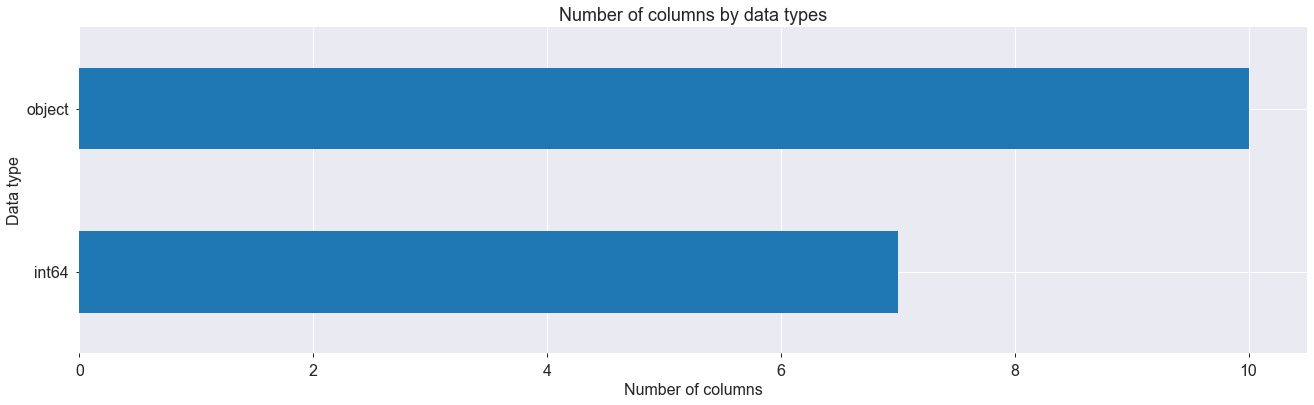

In [29]:
#Count of columns with specific datatype
import matplotlib.pyplot as plt
raw_dataset.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(22, 6),
                                            fontsize=16)

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

In [30]:
raw_dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [31]:
#Count the number of categories for each object data
raw_dataset.select_dtypes('object').apply(pd.Series.nunique, axis=0)

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
deposit       2
dtype: int64

In [ ]:
#pandas profiling

raw_dataset.profile_report(style={'full_width':True})

# To retrieve the list of variables which are rejected due to high correlation
profile = raw_dataset.profile_report()
rejected_variables = profile.get_rejected_variables(threshold=0.9)

# To generate a HTML report
profile = raw_dataset.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="output.html")

#### Notes from pandas profiling report

Missing values: There are no missing values

## Check the distribution of term deposits

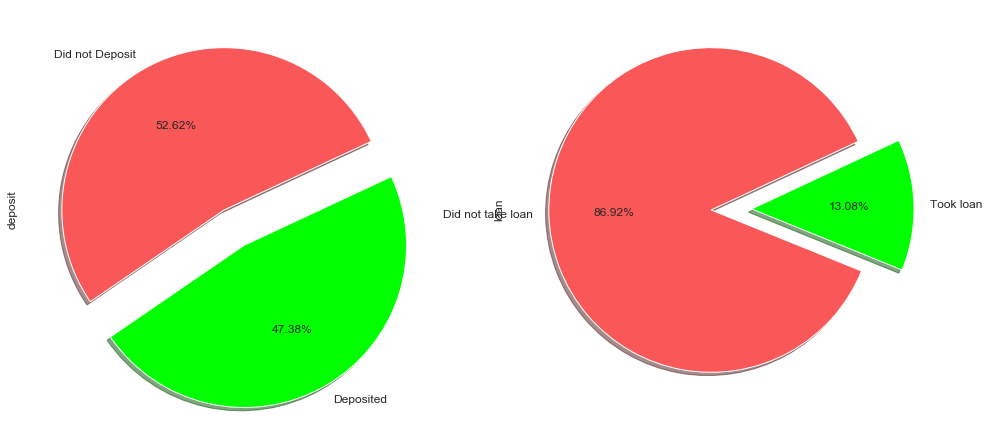

In [101]:
f, ax = plt.subplots(1,2, figsize=(16,8))

labels ="Did not Deposit", "Deposited"
colors = ["#FA5858", "#00ff00"]

raw_dataset["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


labels ="Did not take loan", "Took loan"
colors = ["#FA5858", "#00ff00"]

raw_dataset["loan"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[1], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)
plt.show()
plt.show()

## Check distribution of deposit across categorical columns

#### Job

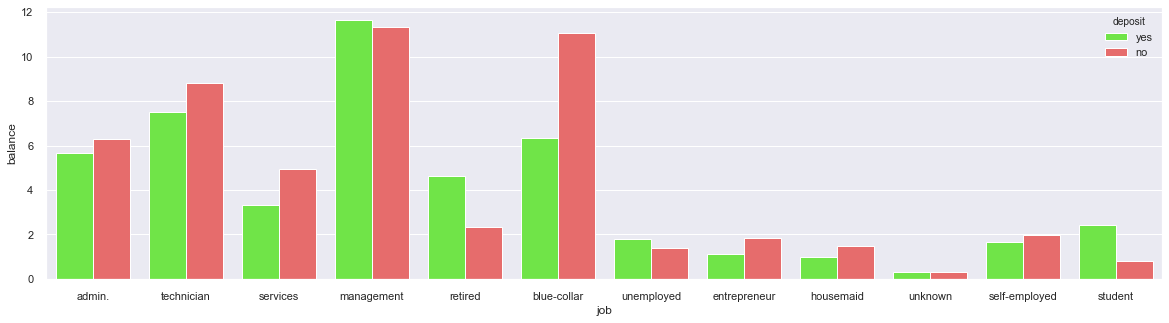

In [94]:
import seaborn as sns

plt.figure(figsize=(20,5))

ax[0].set_ylabel('% of Deposits', fontsize=14)

palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="job", y="balance", hue="deposit", data=raw_dataset, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")

plt.show()

## Account balance and deposit

For better visualization, we will chop off all data points having balance above 75 percentile - Just for the below chart

Text(0, 0.5, 'Balance')

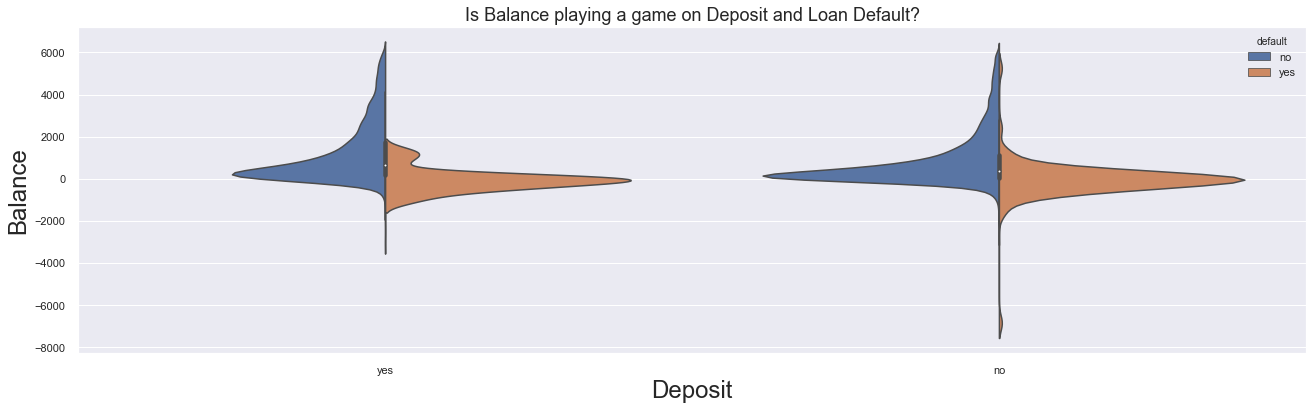

In [116]:
balance_subset75 = raw_dataset[raw_dataset.balance < raw_dataset.balance.quantile(.95)]

fig = plt.figure(figsize=(22, 6))
sns.violinplot(x="deposit",
               y="balance",
               data=balance_subset75,
               hue="default",
               split=True,
               fontsize=16)

plt.title("Is Balance playing a game on Deposit and Loan Default?", fontsize=18)
plt.xlabel("Deposit", fontsize=24)
plt.ylabel("Balance", fontsize=24)

Those who default have low balance in their account

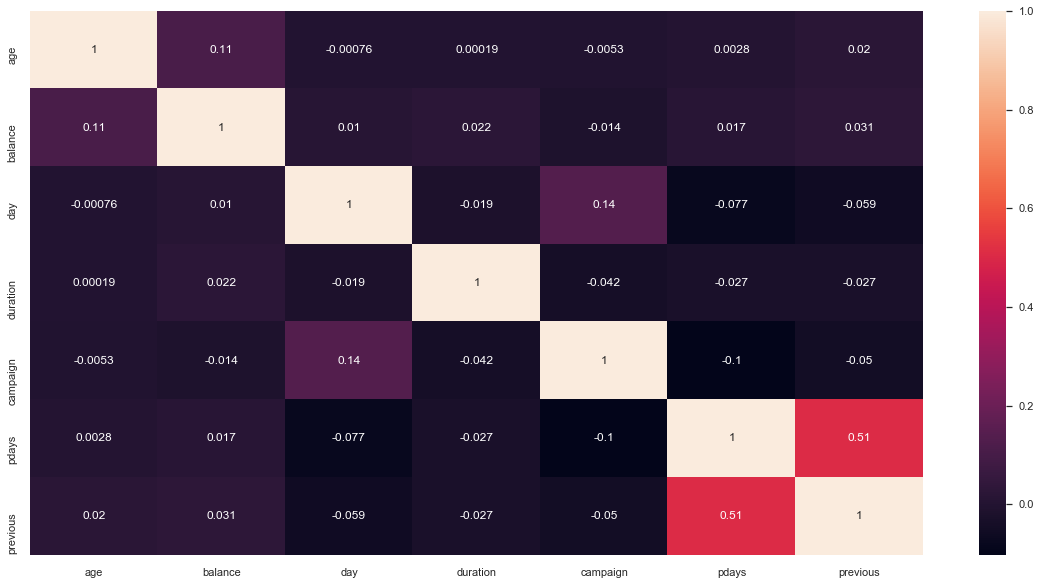

In [100]:
#Correlation
corr_df=raw_dataset.drop(['deposit'],axis=1)

plt.figure(figsize=(20,10)) 
sns.heatmap(corr_df.corr(), annot=True) 

In [20]:
# Pre-processing
# Createtarget variable
target = [
    1 if i == 'yes' else 0
    for i in raw_dataset['deposit']
]

raw_dataset['target'] = target
raw_dataset['target'].value_counts()

0    5873
1    5289
Name: target, dtype: int64

In [21]:
#Pre-processing
#Drop deposit column
raw_dataset.drop('deposit', axis=1, inplace=True)

In [17]:
#Pre-processing
#Imputer - Keeping the code for future use - if the data has missing values

from sklearn.experimental import enable_iterative_imputer
from sklearn import impute
from sklearn.impute import IterativeImputer

imputer = impute.IterativeImputer()
imputed = imputer.fit_transform(
 raw_dataset
)

ValueError: could not convert string to float: 'admin.'

In [12]:
# Do we need to scale?

In [ ]:
#Baseline model
from sklearn.dummy import DummyClassifier
baseline_model = DummyClassifier()
baseline_model.fit(X_train, y_train)
baseline_model.score(X_test, y_test) # accuracy
from sklearn import metrics
metrics.precision_score(
 y_test, baseline_model.predict(X_test)
)